# **2 (Option I). (Trends, Searches, and Sentiment)** 
2 (Option I). (Trends, Searches, and Sentiment)** <br>a. Use the Twitter Trends API to determine the available trending topics for a city of your choice, assigning a tweet volume of 5000 to any trend with no volume provided.

 <br>b. After sorting the trends in descending order by volume, create a bar graph with each (sorted) trend on the x-axis against its volume on the y-axis. 
 
 <br>c. Use the Twitter Search API to find 20 tweets for each of the three most popular trends in the chosen city, and preprocess their associated tweet text (preferring extended tweet text, if available) in a manner appropriate for tweets. 
 
 <br>d. Use `TextBlob` to determine the sentiment for each set of 20 tweets.  
 
 <br> i. Do you notice a substantial difference in the proportion of positive and negative sentiment for the three trends?  Try to theorize why or why not.  
 
 <br> ii. Do you believe the sentiment analysis to be reliable for any or all of the trend?  Explain why or why not.



## Twitter Trends, Searches, and Sentiment

### Load API Keys
 


In [2]:
import tweepy
import os
APIK = os.environ.get('APIK')
APISK = os.environ.get('APISK')
ACCTO = os.environ.get('ACCTO')
ACCTOS = os.environ.get('ACCTOS')
auth = tweepy.OAuthHandler(APIK, APISK) #Set up the app keys
auth.set_access_token(ACCTO,
                      ACCTOS) #set up your user tokens
api = tweepy.API(auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)


### Basic Tweepy Commands

In [3]:
cbhami02 = api.get_user('cbhami02')

In [4]:
api = tweepy.API(auth)


In [5]:
user_info = api.get_user(screen_name='cbhami02')
print(user_info)

User(_api=<tweepy.api.API object at 0x000001B65E949FA0>, _json={'id': 1515682874837643269, 'id_str': '1515682874837643269', 'name': 'Cole Hamilton', 'screen_name': 'Cbhami02', 'location': 'San Antonio, TX', 'profile_location': {'id': '3df4f427b5a60fea', 'url': 'https://api.twitter.com/1.1/geo/id/3df4f427b5a60fea.json', 'place_type': 'unknown', 'name': 'San Antonio, TX', 'full_name': 'San Antonio, TX', 'country_code': '', 'country': '', 'contained_within': [], 'bounding_box': None, 'attributes': {}}, 'description': 'My Developer Account. Just for fun and sharing fascinating topics! Data Enthusiast, Fortniter, Robloxer, and a little bit of nerd.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1, 'friends_count': 90, 'listed_count': 0, 'created_at': 'Sun Apr 17 13:25:44 +0000 2022', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 12, 'lang': None, 'status': {'created_a

In [6]:
print(f'{user_info.followers_count} users are following {user_info.screen_name}.')

1 users are following Cbhami02.


In [7]:
user_info.name  # name associated with the user’s account

'Cole Hamilton'

In [8]:
user_info.screen_name  # user’s Twitter handle

'Cbhami02'

In [9]:
user_info.description  # description from the user’s profile

'My Developer Account. Just for fun and sharing fascinating topics! Data Enthusiast, Fortniter, Robloxer, and a little bit of nerd.'

In [10]:
user_info.status  # most recent tweet's text

Status(_api=<tweepy.api.API object at 0x000001B65E949FA0>, _json={'created_at': 'Sun May 08 17:12:29 +0000 2022', 'id': 1523350136771911681, 'id_str': '1523350136771911681', 'text': '“Data exploration and vizualization on COVID-19 with SQL\xa0, R, and Tableau— PART I” by Rym Bouchetara… https://t.co/iktoEG2xnu', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/iktoEG2xnu', 'expanded_url': 'https://twitter.com/i/web/status/1523350136771911681', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [102, 125]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'geo': None, 'coordinates': None, 'place': None, 'contributors': None, 'is_quote_status': False, 'retweet_count': 0, 'favorite_count': 0, 'favorited': False,

In [11]:
print(f'{user_info.screen_name} is following {user_info.friends_count} users.')

Cbhami02 is following 90 users.


### Tweepy API User Info

In [12]:
api = tweepy.API(auth)

In [13]:
me = api.verify_credentials()

In [14]:
me.name

'Cole'

In [15]:
print(f'I have {me.followers_count} follower.')
print(f'I am following {me.friends_count} users.')

I have 20 follower.
I am following 164 users.


### Rate Limits

In [16]:
api.rate_limit_status()

{'rate_limit_context': {'access_token': '2777419660-hIblVunw1TwIbGqiNE9HWcogMx3OaxTtRe0YxJN'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1652229691},
   '/lists/:id/tweets&GET': {'limit': 900,
    'remaining': 900,
    'reset': 1652229691},
   '/lists/:id/followers&GET': {'limit': 180,
    'remaining': 180,
    'reset': 1652229691},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1652229691},
   '/lists/:id&DELETE': {'limit': 300, 'remaining': 300, 'reset': 1652229691},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1652229691},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1652229691},
   '/lists/:id&GET': {'limit': 75, 'remaining': 75, 'reset': 1652229691},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1652229691},
   '/lists/:id&PUT': {'limit': 300, 'remaining': 300, 'reset': 1652229691},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1652229

In [17]:
cbhami02=api.get_user(screen_name='cbhami02')


In [18]:
print(api.rate_limit_status()['resources']['users']['/users/:id'])

{'limit': 900, 'remaining': 897, 'reset': 1652229679}


In [19]:
print(api.rate_limit_status()['resources']['application']['/application/rate_limit_status'])

{'limit': 180, 'remaining': 180, 'reset': 1652229692}


### Followers

In [20]:
cursor = tweepy.Cursor(api.followers)

In [21]:
followers = []  # for storing followers' User objects
for account in cursor.items(15):  # request only 10 results (10 most recent followers in this case)
    followers.append(account.screen_name)

In [22]:
print('Followers:', 
      ' '.join(sorted(followers, key=lambda s: s.lower())))

Followers: 1SG_Hamilton adore_myBitches BrockCline ChildsSherry GucciManeNtail HamptonRFinest mwyattea OrderUpFayville PjCarl porge10 sayedabdulqadee shefferba49 soldiersofpaint VA_HomeLoan yongkuansima


In [23]:
cursor = tweepy.Cursor(api.followers, screen_name='nasa', count=200)
followers = []
for account in cursor.items(10):  # request 2 pages of followers
    followers.append(account.screen_name)

print(followers)

['HadiHousseini2', 'alexsandraped10', 'vluiz04', 'TranTra01463289', 'Dannydoo44', 'House59174989', 'Ubaldopvtos', 'Dan64118697', 'mshollychesnut', 'Titogualtieri']


In [24]:
cursor = tweepy.Cursor(api.followers_ids, screen_name='nasa', count=5000)
followers_ids = []
for accountid in cursor.items(5000): #request 1 page of follower_ids
    followers_ids.append(accountid)

In [25]:
followers_ids_fragments = [followers_ids[i * 100:(i + 1) * 100] for i in range((len(followers_ids) + 100 - 1) // 100 )] 
print (followers_ids_fragments[0])

[1357511781434806272, 1283861283792658447, 1524182377605611523, 1524183292978896897, 1524183924615704576, 1524183907771555841, 1524183015227858944, 1524183097733832704, 1524183947999076359, 1524180191211368449, 1524168330420142081, 1524183402211069953, 1524183335773351938, 1524183580565405698, 1524182868838256640, 1524183698328985601, 1524183216831311872, 1213859921038430209, 1524180727109140480, 1524183462277783553, 1083257426906730496, 1198384893480329216, 1524183752062160903, 1524183673666473986, 1524182777754697728, 1510578030036586500, 1524183532855255043, 1524183672999616515, 1524181703933243392, 1524180968722116610, 1346483194133061634, 1508370180896075779, 1524183599871844352, 1524182085627518978, 1524183694424129538, 1524182141797609474, 1524181535502524416, 1524180902238113793, 1524183527390167040, 1524183434104508417, 1523849074163675136, 1505567091428143110, 1444466489684201477, 1524181189413777408, 1524183109549232128, 1524183017786429442, 1524179596043767809, 152417978643

### Rate Limits

In [26]:
print(api.rate_limit_status()['resources']['followers']['/followers/ids'])


{'limit': 15, 'remaining': 14, 'reset': 1652229694}


In [27]:
print(api.rate_limit_status()['resources']['users']['/users/lookup'])

{'limit': 900, 'remaining': 900, 'reset': 1652229695}


### Search Tweets by Topic

In [28]:
def print_tweets(tweets):
    """For each Tweepy Status object in tweets, display the 
    user's screen_name and tweet text. If the language is not
    English, translate the text with TextBlob."""
    for tweet in tweets:
        print(f'{tweet.user.screen_name}:', end=' ')
    
        if 'en' in tweet.lang:
            print(f'{tweet.text}\n')
        elif 'und' not in tweet.lang:  # translate to English first
            print(f'\n  ORIGINAL: {tweet.text}')
            try:
                print(f'TRANSLATED: {TextBlob(tweet.text).translate()}\n')
            except:
                print('Unable to translate tweet')

In [29]:
tweets = api.search(q='Johnny Depp', count=3)

In [30]:
print_tweets(tweets) 

rain_hay: RT @bee_papaya: Amber Heard's biggest fear amid the false allegations against Johnny Depp was to be called a liar. Let that sink in.

#Just…

chosirian: RT @bee_papaya: Amber Heard tarnished Johnny Depp's good name, abused him, and made him re-live the nightmares of his childhood and adult l…

Rose53233: I'm calling bullshit on this one:

REAL abuse victims know the difference between actual abuse and a scammer trying… https://t.co/W88Grjls0v



In [31]:
tweets = api.search(q='Johnny Depp :)', count=3) #Only "positive sentiment tweets involving basketball"

In [32]:
tweets = api.search(q='#Heard', count=5)

In [33]:
print_tweets(tweets)

cturtleemmers: WesternWoke: I know people feel extremely divided right now, but if I can hit pause for just a second on the bickering… If the j… https://t.co/WwSKhbA5M5

spaethon: #DeppVsHeard Day 15
7.
#Heard said there was blood everywhere, all over the pillow, she had a broken nose and maybe… https://t.co/aabGqTQoB9

DrSeldaYildiz: @DrProudman OMG!Can we(u) please stop polarizing, blaming ppl 4 seeing the truth. Instead focus on the evidence tha… https://t.co/8QgUQrPb00

spaethon: ...he's punching her still. #Heard lost her memory after than and then woke up. When she woke up, part of the bed w… https://t.co/BUib3vrx9q



### Trends Available

In [34]:
trends_available = api.trends_available()

In [35]:
len(trends_available)

467

In [36]:
trends_available[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [37]:
trends_available[1]

{'name': 'Winnipeg',
 'placeType': {'code': 7, 'name': 'Town'},
 'url': 'http://where.yahooapis.com/v1/place/2972',
 'parentid': 23424775,
 'country': 'Canada',
 'woeid': 2972,
 'countryCode': 'CA'}

In [38]:
world_trends_comp = api.trends_place(id=1)  # Worldwide trending topics (list containing one dictionary)

In [39]:
world_trends = world_trends_comp[0]['trends'] # The 'trends' key is tied to the info about the actual trending topics

In [40]:
world_trends[4]

{'name': '竜ちゃん',
 'url': 'http://twitter.com/search?q=%E7%AB%9C%E3%81%A1%E3%82%83%E3%82%93',
 'promoted_content': None,
 'query': '%E7%AB%9C%E3%81%A1%E3%82%83%E3%82%93',
 'tweet_volume': 28565}

In [41]:
for iter in range(3):
    print(world_trends[iter])

{'name': '上島さん', 'url': 'http://twitter.com/search?q=%E4%B8%8A%E5%B3%B6%E3%81%95%E3%82%93', 'promoted_content': None, 'query': '%E4%B8%8A%E5%B3%B6%E3%81%95%E3%82%93', 'tweet_volume': 278821}
{'name': 'ショック', 'url': 'http://twitter.com/search?q=%E3%82%B7%E3%83%A7%E3%83%83%E3%82%AF', 'promoted_content': None, 'query': '%E3%82%B7%E3%83%A7%E3%83%83%E3%82%AF', 'tweet_volume': 65567}
{'name': '#SalarioRosaVePorMas', 'url': 'http://twitter.com/search?q=%23SalarioRosaVePorMas', 'promoted_content': None, 'query': '%23SalarioRosaVePorMas', 'tweet_volume': 63980}


In [42]:
world_trends_baseline = [t for t in world_trends if t['tweet_volume']]
world_trends_high_volume = [t for t in world_trends if (t['tweet_volume']) and(t['tweet_volume']>100000)]
print(f'Total world trends: {len(world_trends)}') #Remember that the cap of returned trends is 50!
print(f'Total world trends >10k volume: {len(world_trends_baseline)}')
print(f'Total world trends >100k volume: {len(world_trends_high_volume)}')


Total world trends: 50
Total world trends >10k volume: 24
Total world trends >100k volume: 3


### World_Trends

In [43]:
from operator import itemgetter 

In [44]:
World_trends_w_volume = [t for t in world_trends if (t['tweet_volume'])]
print(f'Total World trends >15k volume: {len(World_trends_w_volume)}')


Total World trends >15k volume: 24


In [45]:
world_trends_baseline.sort(key=itemgetter('tweet_volume'), reverse=True) #sort world trends by descending volume

In [46]:
for trend in world_trends_baseline[:10]: #Display the top 5 topics by volume
    print(trend['name'])

#CafStinks
#Eurovision
上島さん
芸人さん
ショック
Rick Scott
#SalarioRosaVePorMas
Araujo
iPod
Gago


### SA_Trends

In [47]:
SA_trends_comp = api.trends_place(id=2487796)

In [48]:
SA_trends = SA_trends_comp[0]['trends']

In [49]:
SA_trends_baseline = [t for t in SA_trends if t['tweet_volume']]

In [50]:
for trend in SA_trends_baseline:
    print(trend)

{'name': 'TONY MONTANA', 'url': 'http://twitter.com/search?q=%22TONY+MONTANA%22', 'promoted_content': None, 'query': '%22TONY+MONTANA%22', 'tweet_volume': 397425}
{'name': 'Cruz', 'url': 'http://twitter.com/search?q=Cruz', 'promoted_content': None, 'query': 'Cruz', 'tweet_volume': 84515}
{'name': 'Correa', 'url': 'http://twitter.com/search?q=Correa', 'promoted_content': None, 'query': 'Correa', 'tweet_volume': 21488}
{'name': '#LeahisOurAnnabeth', 'url': 'http://twitter.com/search?q=%23LeahisOurAnnabeth', 'promoted_content': None, 'query': '%23LeahisOurAnnabeth', 'tweet_volume': 47825}
{'name': '#Bidenflation', 'url': 'http://twitter.com/search?q=%23Bidenflation', 'promoted_content': None, 'query': '%23Bidenflation', 'tweet_volume': 21908}
{'name': 'Jessica', 'url': 'http://twitter.com/search?q=Jessica', 'promoted_content': None, 'query': 'Jessica', 'tweet_volume': 88608}
{'name': 'Azuki', 'url': 'http://twitter.com/search?q=Azuki', 'promoted_content': None, 'query': 'Azuki', 'tweet_vo

In [51]:
print(f'SA trends >15k volume: {len(SA_trends_baseline)}')


SA trends >15k volume: 20


In [52]:
SA_trends_baseline.sort(key=itemgetter('tweet_volume'), reverse=True) 

In [53]:
for trend in SA_trends_baseline[:20]:
    print(trend['name'])

TONY MONTANA
Azuki
Jessica
Cruz
Rick Scott
Medicare
iPod
#LeahisOurAnnabeth
Ultra MAGA
Wayne
#Bidenflation
Correa
Wallo
Devils
Montreal
#inflation
Hilary Duff
Duncan
Carti
Hurricane Gun


In [54]:
SA_topics = {}  # dictionary to store trend names and volumes for San Antonio


In [55]:
print(SA_topics)

{}


In [56]:
for trend in SA_trends_baseline:
    SA_topics[trend['name']] = trend['tweet_volume']

In [57]:
import pandas as pd

SAdf = pd.DataFrame(SA_topics, index = [0]) 

In [58]:
SAdf.head()

,TONY MONTANA,Azuki,Jessica,Cruz,Rick Scott,Medicare,iPod,#LeahisOurAnnabeth,Ultra MAGA,Wayne,#Bidenflation,Correa,Wallo,Devils,Montreal,#inflation,Hilary Duff,Duncan,Carti,Hurricane Gun
0,397425,106628,88608,84515,64054,60673,57942,47825,35887,34194,21908,21488,15708,13514,12671,12066,11626,11196,10629,10316


<AxesSubplot:title={'center':'Trends in San Antonio'}, xlabel='Trends', ylabel='Count'>

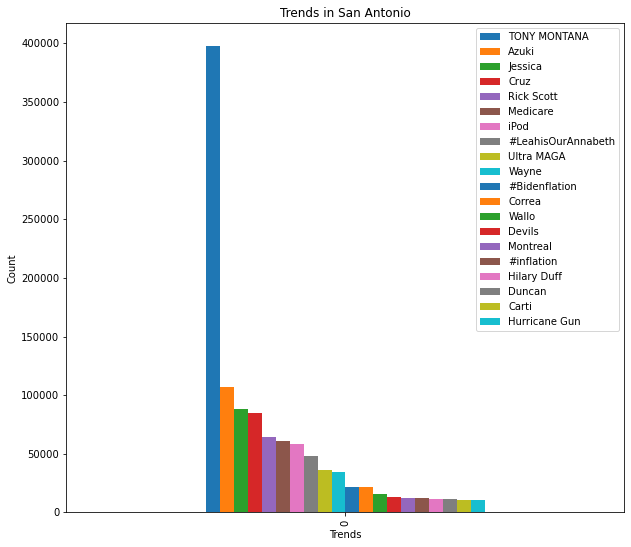

In [59]:
#Plot Descending
SAdf.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="Trends in San Antonio")

### WordCloud for SA_Trends

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [61]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
mask = np.array(Image.open('Texas.jpg'))

wordcloud_SA = WordCloud(mask=mask, width=1800, height=900,
    prefer_horizontal=0.5, min_font_size=10, colormap='prism', 
    background_color='white')

In [62]:
wordcloud_SA = wordcloud_SA.fit_words(SA_topics)

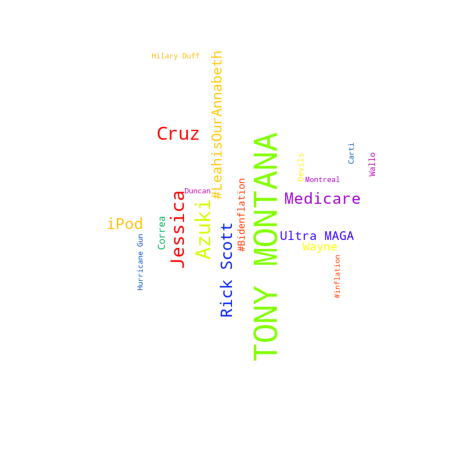

In [63]:

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
mask = np.array(Image.open('Texas.jpg'))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_SA)
plt.axis("off")
plt.show()

## Tweet Listener

### Load Packages

In [64]:
from tweetlistener import TweetListener
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy import API
import preprocessor as p
from prepsubjecttweets import prepsubject

### Test Tweet Listener and Clean Tweet

In [67]:
tweet_text = 'RT #NASA A sample retweet with a URL https://nasa.gov'

In [68]:
p.clean(tweet_text)

'A sample retweet with a URL'

### Tweet Listener - Load Top Three Trends

In [70]:
tweetlistraw1,tweetlistprep1 = prepsubject('Macron',20)
tweetlistraw2,tweetlistprep2 = prepsubject('Ranboo',20)
tweetlistraw3,tweetlistprep3 = prepsubject('Publix',20)

### Number 1 Tweet Topic

In [71]:
tweetlistraw1

['RT @mhmck: French President Emmanuel Macron says "don\'t humiliate Russia".\n\nI say don\'t humiliate Ukraine, as France did in 1919 when the T…',
 'RT @Fatassinari: ATM Macron’s proposal suspiciously resembles the EU’s moribund Neighbourhood Policy. That can be summarised by Prodi’s 20…',
 'RT @mhmck: Ukraine is the only fighting defender of Europe. Emmanuel Macron says it will take "decades" for Ukraine to join the EU.\n\nThe Ru…',
 "@BobRuth12 @thetimes Didn't #Putin already fool #Macron by saying there was never going to be an invasion of… https://t.co/5fjozM56q1",
 "RT @KyleWOrton: #France's President Macron digging in on the mistakes with #Russia and expanding them to #China https://t.co/TtZBWOtZqu",
 'RT @mhmck: Ukraine is the only fighting defender of Europe. Emmanuel Macron says it will take "decades" for Ukraine to join the EU.\n\nThe Ru…',
 '@EerikNKross On the other hand it must be extremely patronizing and humiliating for Putin to hear Macron treating h… https://t.co/M4F

In [72]:
tweetlistprep1

[': French President Emmanuel Macron says "don\'t humiliate Russia".I say don\'t humiliate Ukraine, as France did in when the T',
 ': ATM Macrons proposal suspiciously resembles the EUs moribund Neighbourhood Policy. That can be summarised by Prodis',
 ': Ukraine is the only fighting defender of Europe. Emmanuel Macron says it will take "decades" for Ukraine to join the EU.The Ru',
 "Didn't already fool by saying there was never going to be an invasion of",
 ": 's President Macron digging in on the mistakes with and expanding them to",
 ': Ukraine is the only fighting defender of Europe. Emmanuel Macron says it will take "decades" for Ukraine to join the EU.The Ru',
 'On the other hand it must be extremely patronizing and humiliating for Putin to hear Macron treating h',
 ': Macron clearly has a wrong address for his "don\'t humiliate Russia" call. This should be told to Putin, his gang and the R',
 ': Macron clearly has a wrong address for his "don\'t humiliate Russia" call. This shou

### Number 2 Tweet Topic

In [73]:
tweetlistraw2

['RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'i feel like ranboo would love the sci guys',
 '#ranboospace\nRanboo do you know any Kevins? I have this theory that all the Kevins are going feral /hj https://t.co/FFcZzH75Fr',
 'RT @PlantOnSpace: He is king of the birds\n#ranboo #ranboofanart https://t.co/OCupXInjRK',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RANBOO DID A SPACE??',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @RanbooUpdates: Ranboo posted on his Instagram Story! :D https://t.co/NLpmgrahaX',
 'Why do I have a sense that Ranboo was

In [74]:
tweetlistprep2

[': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 'i feel like ranboo would love the sci guys',
 'do you know any Kevins? I have this theory that all the Kevins are going feral /hj',
 ': He is king of the birds',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 'RANBOO DID A SPACE??',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo posted on his Instagram Story!',
 'Why do I have a sense that Ranboo was somehow in ISWM (in space with Markiplier) and we never knew',
 ': Markiplier RanbooThinks that space is really cool',
 ': XIAOBOO [ rts appreciated ]',
 'just chilling with hank green listenting to ranboo talking about lobotomy',
 'OH ITS IN THE RANBOO SPACEIM SMART',
 'Listening to a ranboo space is so confusing because one minute we are talking about pigeons , then death

### Number 3 Tweet Topic

In [75]:
tweetlistraw3

['@ACatNamedMo what was the name of that wine at Publix you raves about?',
 '@nandorvila In the same vein, I was in a little Havana Publix yesterday and one of my fellow Cubans was just casual… https://t.co/YThjangR2r',
 'I confidently shop at Publix now. Inflation is everywhere .. minus well.',
 'RT @overtime: Bro was so disappointed in himself 😭\n(via publix.ale/TT) https://t.co/mcPfeiRzbg',
 "@Marla_Knits @Franktheshank88 It's been a little different the last couple of years.\nCan't tell you how many Publix… https://t.co/bZzCvtdQ31",
 '@marcodupa If nana can be fully alive working at Publix throwin subs together you can manage.',
 '@PublixHelps Thank you.His name is Jorge Espinel at the Hallandale beach FL 402 liquor store.He’s always so nice to… https://t.co/Y14vyXJJ01',
 'Proud of myself today. I Walked through the entire Publix bakery section &amp; made it through without a single treat i… https://t.co/a4hhFvjt0T',
 'Publix put a piece of chicken in my potato wedge bag they tried

In [76]:
tweetlistprep3

['what was the name of that wine at Publix you raves about?',
 'In the same vein, I was in a little Havana Publix yesterday and one of my fellow Cubans was just casual',
 'I confidently shop at Publix now. Inflation is everywhere .. minus well.',
 ': Bro was so disappointed in himself (via publix.ale/TT)',
 "It's been a little different the last couple of years.Can't tell you how many Publix",
 'If nana can be fully alive working at Publix throwin subs together you can manage.',
 'Thank you.His name is Jorge Espinel at the Hallandale beach FL liquor store.Hes always so nice to',
 'Proud of myself today. I Walked through the entire Publix bakery section &amp; made it through without a single treat i',
 'Publix put a piece of chicken in my potato wedge bag they tried to murder me',
 "- James Cromwell's protest is interesting. Vegan milk used to be more expensive. Now",
 'i love publix',
 'I always want a Publix chicken tender wrap. The only time I dont want a Publix chicken tender wrap i

## Stream

### Load Packages

In [77]:
from tweepy.streaming import Stream
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob

### Sentiment Listener Topic 1

In [78]:
run sentimentlistener.py "#Macron" 20

KeyboardInterrupt: 

### Sentiment Listener Topic 2

In [ ]:
run sentimentlistener.py "Ranboo" 20

+ mellohayl: dream saying that ranboo talking about being unlabeled was really validating LET ME GO CRY

  beloved_natalia: DREAM AND RANBOO CRUMBS

- bbygnf: dream saying he felt validated by ranboo excuse me while i SOB MY FUCKING EYES OUT 😭💗💗💗

  Mistoazt: @Rosemybeloved_ RANBOO CAME OUT

+ patito4k: what a great day to be unlabeled. SO PROUD OF YOU RANBOO 💗

+ dogIove24: @dreamsecretclub SO TRUE!! im so proud of ranboo

+ karlseuphoria: I MISSED THE ANNOUNCEMENT BUT IM SO PROUD OF RANBOO OHMMYOGD

  gnfs4k: RANBOO AND DREAM 🥹🥹🥹🥹❤️❤️❤️❤️❤️

  purple_sockss: @dreamsecretclub go ranboo go

+ incelbr: ranboo Coming out gave me whiplash like I completely forgot LGBTQ's were real

+ kaylaXcorpse: @dreamsecretclub Love for ranboo &lt;33

- euthymiapIane: MCYT DSMP RANBOO IS GAY IM SORRY I DONT REALLY CARE BUT THATS CRAZY

+ darlenedytee: i am fucking sobbing dream you whore i lovw you so much how could you do tihs to me i am so proud of you and ranboo…

+ planet_marss_: OH RANBOO LIKE ACT

### Sentiment Listener Topic 3

In [ ]:
run sentimentlistener.py "Publix" 20

  AVR19741: @MiaCathell @JZubosky @Jack_Petocz @Publix Oh please. You demeaned his work, just take the L on this and move on.

+ DalyKenan: @Jack_Petocz @Publix It’s not the Dint say gay bill, that is a fiction.

  Lorigoldst: @Jack_Petocz @grampage_on @Publix I stopped shopping at Publix when I saw they were big contributors for 2nd Amendm…

  trudy_mcquiston: @klmcgee1978 @ProudTwinkie @TaylorLorenz Publix hires at 14.

  red_nov3: @AdamSchiavone @TimRunsHisMouth @Jack_Petocz @Publix “The party of working people?” So workers belong to one party…

+ SharkeyTim: @Jack_Petocz @Publix So brave. Yet so ignorant.

+ CircusHypocrisy: @Jack_Petocz @Publix Public is great. They’ll figure out a way to hire another $10 per hour overly sensitive and fragile cashier boy.

  JerseyMade93: Oh Publix racists

  Garyknowsitall: @davidhogg111 @ChristinaPushaw Jack started working at Publix when he was 13? Doubt it. Either way, youth is no fre…

  AdamMathisFL: @exjon Have it had their sammiches? Publi

In [ ]:
dftrend1 = pd.DataFrame({'Positive' : [15],
'Neutral' : [4],
'Negative' : [1]})
dftrend1.head()


,Positive,Neutral,Negative
0,15,4,1


In [ ]:
dftrend2 = pd.DataFrame({'Positive' : [11],
'Neutral' : [6],
'Negative' : [3]})
dftrend2.head()


,Positive,Neutral,Negative
0,11,6,3


In [ ]:
dftrend3 = pd.DataFrame({'Positive' : [7],
'Neutral' : [11],
'Negative' : [2]})
dftrend3.head()
#dftrend1.to_csv('dfs.csv', index = False)

,Positive,Neutral,Negative
0,7,11,2


<AxesSubplot:title={'center':'#1 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

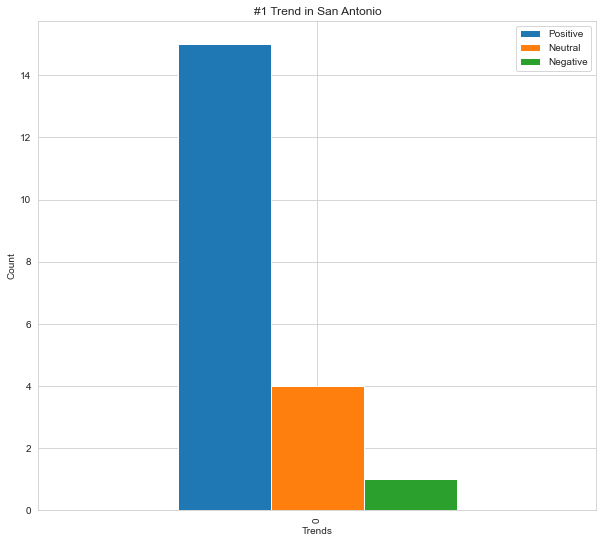

In [ ]:
dftrend1.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#1 Trend in San Antonio")

<AxesSubplot:title={'center':'#2 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

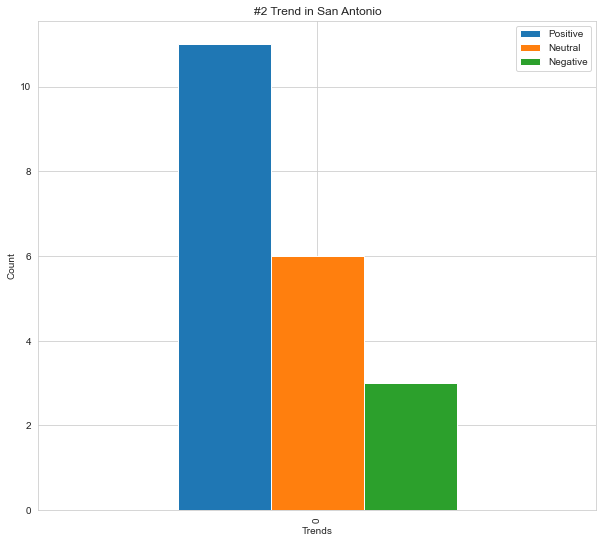

In [ ]:
dftrend2.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#2 Trend in San Antonio")

<AxesSubplot:title={'center':'#3 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

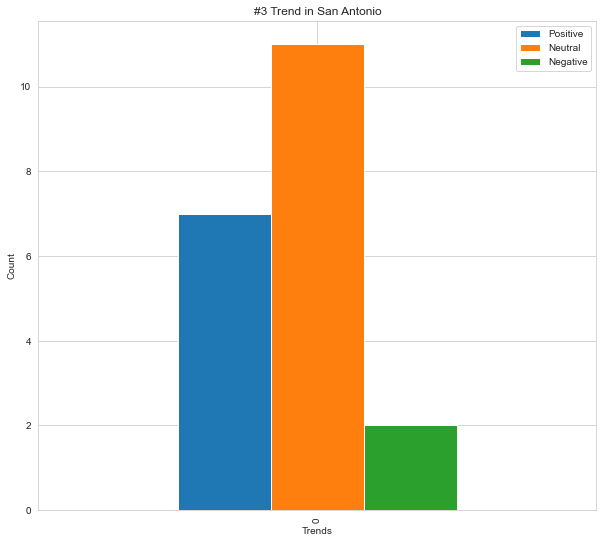

In [ ]:
dftrend3.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#3 Trend in San Antonio")

## Geocoding

In [84]:
import os
from geopy import OpenMapQuest

In [85]:
geo = OpenMapQuest(api_key=os.environ['GeoCK'])
locations = ['222 Eastern Pkwy, Louisville, KY 40208',
             '440 N Whittington Pkwy, Louisville, KY 40222',
             'El Alamein، Egypt']
geo_locations = []
for loc in locations:
    geo_locations.append(geo.geocode(loc))

In [86]:
geo_locations

[Location(Duthie Center for Engineering, 222, Eastern Parkway, Louisville, Jefferson County, Kentucky, 40208, United States of America, (38.21264035, -85.7608605714874, 0.0)),
 Location(Burhans Hall, 440, North Whittington Parkway, Hurstbourne, Jefferson County, Kentucky, 40222, United States of America, (38.25334785, -85.5843224594185, 0.0)),
 Location(العلمين, مطروح, مصر, (30.833944, 28.949268, 0.0))]

In [87]:
from tweetutilities import get_tweepy_API

In [88]:
api = get_tweepy_API()

In [89]:
tweets = [] 
counts = {'total_tweets': 0, 'locations': 0}


### Location Listener

In [90]:
from locationlistener import LocationListener

In [91]:
location_listener = LocationListener(api, counts_dict=counts, 
    tweets_list=tweets, topic='Will Smith', limit=150)

In [92]:
stream = tweepy.Stream(auth=api.auth, listener=location_listener)

In [93]:
stream.filter(track=['Will Smith'], languages=['en'], is_async=False)

rmossconti: being able to recall various hilarious Will Smith rap lines is both a gift and a curse but can proudly say I’ve got… https://t.co/ehyZctJ2Ad

Mangakiko12: Steve Harvey has choice words for Will Smith after he slapped Chris Rock at the Oscars https://t.co/B1zWhNzJx6

balogunjide1: OK, Will Smith went too far, slapping Chris Rock with the whole world watching. But should he continue to be punish… https://t.co/5UPSt34c5Z



In [ ]:
counts['total_tweets'] #total tweets examined

8

In [ ]:
counts['locations'] #tweets kept (should match # for LocationListener limit UNLESS there was a timeout)

4

In [ ]:
print(f'{counts["locations"] / counts["total_tweets"]:.1%}') # % tweets that had locations

50.0%


In [ ]:
from tweetutilities import get_geocodes

In [ ]:
tweet_locations_fail = get_geocodes(tweets)

Getting coordinates for tweet locations...
Done geocoding


In [ ]:
tweet_locations_fail

1

In [ ]:
print(f'{tweet_locations_fail / counts["locations"]:.1%} of the locations could not be deciphered.')

25.0% of the locations could not be deciphered.


### Location Listener DataFrame

In [ ]:
import pandas as pd

In [ ]:
dft2 = pd.DataFrame(tweets)
dft = pd.DataFrame(tweets)

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   screen_name  4 non-null      object
 1   text         4 non-null      object
 2   location     4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [ ]:
dft.head()

,screen_name,text,location
0,therealjayber,Imagine the kind of spellbinding power that Ja...,Tweet Smarter. Grow Faster. 👉
1,chomps443,@LeafyIsHere Will Smith should be white,The motion of the Ocean
2,biplov_jha,What have we learned from Will Smith and Johnn...,Nepal
3,KassAssassin,"I know his is ridiculous, but what upsets me t...","Brooklyn, NY"


In [ ]:
dft = dft.dropna()

In [ ]:
dft.head()

,screen_name,text,location
0,therealjayber,Imagine the kind of spellbinding power that Ja...,Tweet Smarter. Grow Faster. 👉
1,chomps443,@LeafyIsHere Will Smith should be white,The motion of the Ocean
2,biplov_jha,What have we learned from Will Smith and Johnn...,Nepal
3,KassAssassin,"I know his is ridiculous, but what upsets me t...","Brooklyn, NY"


In [ ]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   screen_name  4 non-null      object
 1   text         4 non-null      object
 2   location     4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [ ]:
dft2.shape

(4, 3)

In [ ]:
dft.to_csv('dft.csv', index = False)
dft2.to_csv('dft2.csv', index = False)

### Map the Tweets

In [ ]:
import folium

In [ ]:
usmap = folium.Map(location=[39.8283, -98.5795],  # center of U.S.
                   tiles='Stamen Terrain',
                   zoom_start=4, detect_retina=True)

In [ ]:
usmap.save('base_map.html')

In [ ]:
for t in dft.itertuples():
    text = ': '.join([t.screen_name, t.text])
    popup = folium.Popup(text, parse_html=True)
    marker = folium.Marker((t.latitude, t.longitude), 
                           popup=popup)
    marker.add_to(usmap)

AttributeError: 'Pandas' object has no attribute 'latitude'

In [ ]:
usmap.save('tweet_map.html')

In [ ]:
usmap

In [ ]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [ ]:
import json
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [ ]:
with open('accounts.json', 'r') as accounts:
    accounts_from_json = json.load(accounts)

In [ ]:
print(accounts_from_json) #The one-key-to-one-value dictionary object
print(type(accounts_from_json))

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]}
<class 'dict'>


In [ ]:
print(accounts_from_json['accounts']) #The individual dictionaries per account

[{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]


In [ ]:
print(accounts_from_json['accounts'][0]) #The first dictionary/account 
print(accounts_from_json['accounts'][1]) #The second dictionary/account 

{'account': 100, 'name': 'Jones', 'balance': 24.98}
{'account': 200, 'name': 'Doe', 'balance': 345.67}


In [ ]:
import json

In [ ]:
with open('savedtweets.json', 'w') as outfile:
    json.dump(tweets, outfile, indent=4)

In [ ]:
with open('savedtweets.json') as json_file:
    tweets_from_json = json.load(json_file)


In [ ]:
tweets_from_json

[{'screen_name': 'therealjayber',
  'text': 'Imagine the kind of spellbinding power that Jada wields over Will Smith.\n\nOne unhappy look, and Will was immediatel… https://t.co/lOkKii20KH',
  'location': 'Tweet Smarter. Grow Faster. 👉'},
 {'screen_name': 'chomps443',
  'text': '@LeafyIsHere Will Smith should be white',
  'location': 'The motion of the Ocean'},
 {'screen_name': 'biplov_jha',
  'text': 'What have we learned from Will Smith and Johnny Depp?',
  'location': 'Nepal'},
 {'screen_name': 'KassAssassin',
  'text': 'I know his is ridiculous, but what upsets me the most about the Will Smith thing is, after getting slapped, Chris R… https://t.co/G3oxLaZ7ta',
  'location': 'Brooklyn, NY'}]

C:\Users\coleb\mambaforge\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


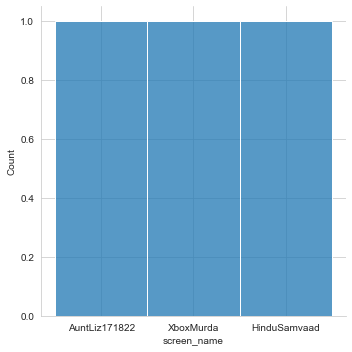

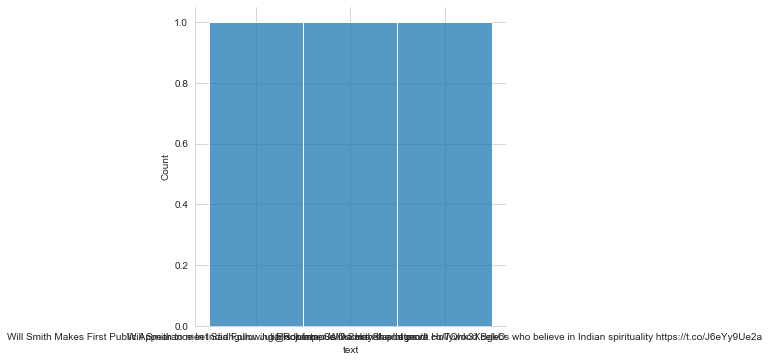

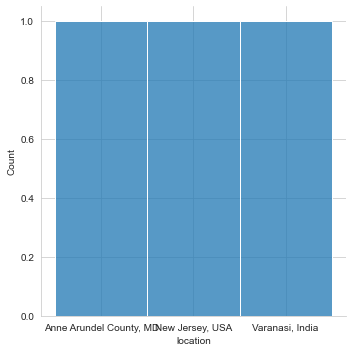

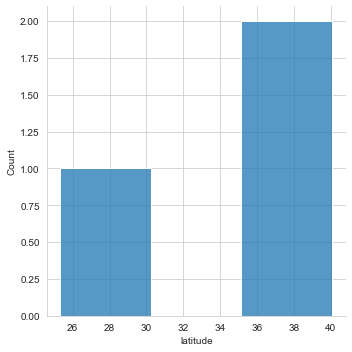

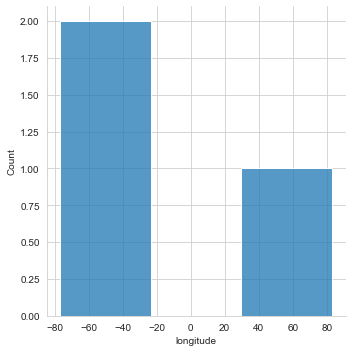

In [ ]:
for column in dft:
    sns.displot(x=column, data=dft)

In [ ]:
dft.corr()

,latitude,longitude
latitude,1.000000,-0.996873
longitude,-0.996873,1.000000


In [ ]:
dft.describe()

,latitude,longitude
count,3.000000,3.000000
mean,34.794549,-22.656662
std,8.210207,91.514389
min,25.335649,-76.573454
25%,32.153954,-75.488808
50%,38.972258,-74.404162
75%,39.523998,4.301733
max,40.075738,83.007629


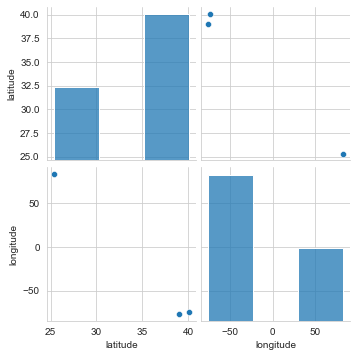

In [ ]:
sns.pairplot(dft)